# Практика 9
Корешков

```
9)
Обчислити інтеграл від функції f(x) на відрізку [a;b]  при n=10 методом Х і оцінити отриману похибку
1) Корешков Михайло   f(x)=(x+2)/(x^2+1); 
[a;b]=[0,7;1,5] методом трапецій

```

# Теорія
В якості наближення інтегралів береться квадратурна формула вигляду  
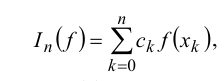

Нехай далі:  
$I(f) = \int_a^b f(x)dx$,  
$L_n(f)$ - інтерполяція $f$ поліномом степеню $n$,  
$I_T, R_T$ - обчислений методом трапецій чисельний інтеграл та його помилка, відповідно,  
$r_n(x) = L_n(f)(x) - f(x)$ - залишковий член поліноміальної інтерполяції.

## Метод трапецій

Для методу трапецій маємо наступну формулу для одного відрізку $[a;b]$:  
$I_T(f) = (b-a)\frac{f(a) + f(b)}{2}$
що відповідає площі трапеції з висотами $f(a), f(b)$ та основою $(b-a)$.

Формула інтегрування матиме алгебрачний степінь точності $m=1$, бо:  
$I_T(1) = (b-a)\cdot\frac{1+1}{2} = b-a = \int_a^b 1dx$  
$I_T(x) = (b-a)\cdot\frac{a+b}{2} = \frac{b^2-a^2}{2} = \int_a^b xdx$  
$I_T(x^2) = \frac{(b-a)(a^2+b^2)}{2} \ne \frac{b^3-a^3}{3} = \int_a^b x^2dx$


Оцінка помилки інтегрування.  
Зверну увагу, що для формули інтегрування з алгебр. точністю $m$ для справедливо $I_m(f) = I(L_m(f))$.  
Також, відомо, що залишковий член має вигляд $r_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}\prod_{k=0}^n(x-x_k)$ для деякого $\xi \in [a;b]$.  
Тоді

$R_T(f) = R_1(f) = I_1(f) - I(f) = I(L_1(f)) - I(f) = I(L_1(f)-f) = I(r_1) = $  
$= \int_a^b \frac{f''(\xi)}{2}(x-a)(x-b) dx = ... = f''(\xi)\frac{(b-a)^3}{12}$  
$R_1(f) \le M_2 \frac{(b-a)^3}{12}$

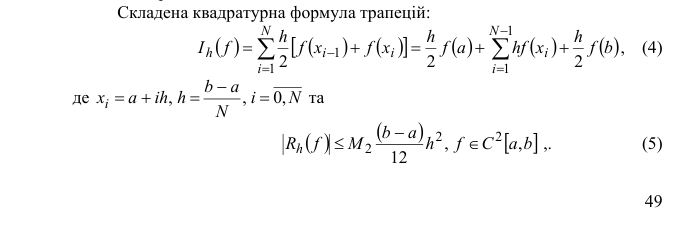

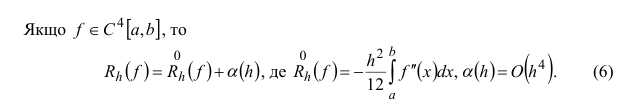


In [7]:
import numpy as np

xlims = 0.7, 1.5
N = 10
def f(x): 
    return (x+2)/(x**2+1)

In [5]:
# Integrate using the composite trapezoidal rule.
# 
# If X is provided, assuming non-uniform steps.
# If X is None, using h as a constant step.
def trapz(Y, X=None, h=1):
    N = Y.shape[0]
    if X is None:
        return h * ( Y[0]/2 + Y[-1]/2 + np.sum(Y[1:-1]))
    # else
    d = np.diff(X)
    Y1 = Y[:-1] + Y[1:]
    return np.sum(d * Y1 /2)

In [33]:
X = np.linspace(*xlims, N+1)
assert X.shape[0] == N+1
h = (xlims[1] - xlims[0])/N

print("Using:")
print("N= ", N)
print("X= ", X)
print("h= ", h)

Using:
N=  10
X=  [0.7  0.78 0.86 0.94 1.02 1.1  1.18 1.26 1.34 1.42 1.5 ]
h=  0.08


## Візуалізація

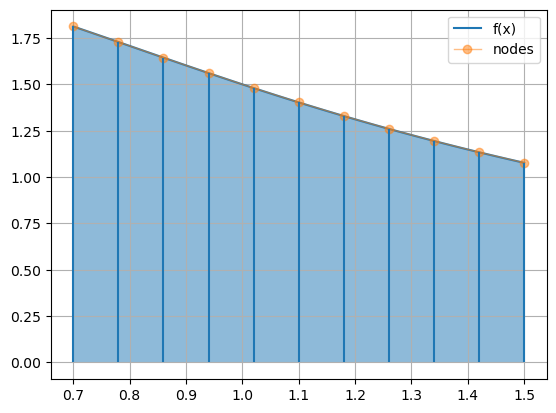

In [34]:
import matplotlib.pyplot as plt

xv = np.linspace(*xlims, 100)
Y = f(X)

plt.plot(xv, f(xv), label='f(x)')
plt.plot(X, Y, 'o-', label='nodes', alpha=0.5, lw=1)
plt.fill_between(X, 0, Y, alpha=0.5)
plt.vlines(X, 0, Y)
plt.grid()
plt.legend()

## Виконуємо інтегрування та оцінюємо помилку

In [31]:
# 1. Аналітично
def calc(a,b):
    import sympy as sym
    x = sym.symbols('x')
    return sym.integrate(f(x), (x, a, b))

I = float(calc(*xlims))
print("True value is I =",I)

True value is I = 1.13407495590838


In [35]:
# 2. Чисельно методом трапецій
Y = f(X)

print(f"h = {h}")
print(f"(b-a) = {xlims[1] - xlims[0]}")

I1 = trapz(Y, h=h)
R1 = I1 - I
E1 = I1/I - 1
print("I1 = ", I1)
print(f"R1 = {R1}  (E1 = {E1:.5g})")

I2 = trapz(Y, X)
R2 = I2 - I
E2 = I2/I - 1
print("I2 = ", I2)
print(f"R2 = {R2}  (E2 = {E2:.5g})")



h = 0.08
(b-a) = 0.8
I1 =  1.134259344976933
R1 = 0.0001843890685528926  (E1 = 0.00016259)
I2 =  1.134259344976933
R2 = 0.0001843890685528926  (E2 = 0.00016259)


Начебто добре, але порівняємо з теоретичною оцінкою.

Символьно обчислюємо другу похідну $f$, компілюємо результат у функцію, чисельно знаходимо найбільше значення її модуля.

M2 =  0.6633010836996589


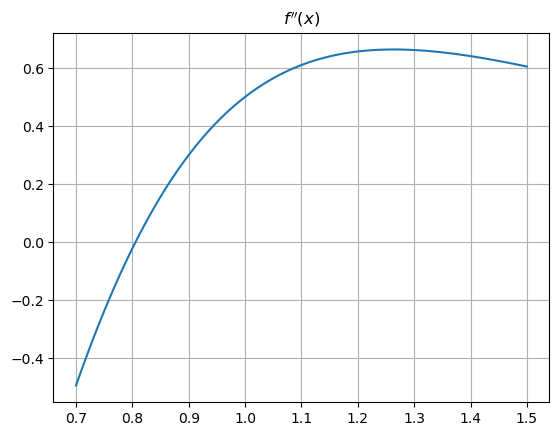

In [44]:
def calc_M2():
    import sympy as sym
    x = sym.symbols('x')
    lfp2 = sym.lambdify(x, sym.diff(f(x), x, x))
    fpp = lfp2(xv)
    return fpp

fpp = calc_M2()
plt.title("$f''(x)$")
plt.plot(xv,fpp)
plt.grid()
M2 = np.abs(fpp).max()
print("M2 = ", M2)

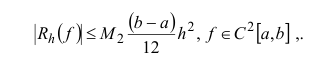

In [50]:
R_theor = M2 * h**2 * (xlims[1] - xlims[0]) / 12
print("теоретична помилка R_h(f) = ", R_theor)
print(f"практична помилка R1 = {R1} {'<'  if R1 < R_theor else '>'} R_h(f) ")

теоретична помилка R_h(f) =  0.00028300846237852117
практична помилка R1 = 0.0001843890685528926 < R_h(f) 


Бачимо, що практична помилка дійсно менше за теоретичну, тобто доцільно вважати, що алгоритм чисельного інтегрування методом трапецій реалізовано коректно